In [1]:
#Importing Necessary Libararies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the data 
resturant_data = pd.read_csv("Dataset .csv")
resturant_data.head(6)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336


In [3]:
# Dropping duplicate data
print("Shape of the data:",resturant_data.shape)
resturant_data.drop_duplicates(inplace=True)
print("Shape of the data:",resturant_data.shape)

Shape of the data: (9551, 21)
Shape of the data: (9551, 21)


In [4]:
# Data Sanity Check
resturant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Looking for missing values percentage.
(resturant_data.isnull().mean()*100).round(2)

Restaurant ID           0.00
Restaurant Name         0.00
Country Code            0.00
City                    0.00
Address                 0.00
Locality                0.00
Locality Verbose        0.00
Longitude               0.00
Latitude                0.00
Cuisines                0.09
Average Cost for two    0.00
Currency                0.00
Has Table booking       0.00
Has Online delivery     0.00
Is delivering now       0.00
Switch to order menu    0.00
Price range             0.00
Aggregate rating        0.00
Rating color            0.00
Rating text             0.00
Votes                   0.00
dtype: float64

## Conclusion:
* **We only have 9 data missing in cuisines which is 0.09 percent which is very low.So, we can delete them.**

In [6]:
# Dropping Null columns
resturant_data.dropna(inplace=True)

In [7]:
# Looking for missing values again
(resturant_data.isnull().mean()*100).round(2)

Restaurant ID           0.0
Restaurant Name         0.0
Country Code            0.0
City                    0.0
Address                 0.0
Locality                0.0
Locality Verbose        0.0
Longitude               0.0
Latitude                0.0
Cuisines                0.0
Average Cost for two    0.0
Currency                0.0
Has Table booking       0.0
Has Online delivery     0.0
Is delivering now       0.0
Switch to order menu    0.0
Price range             0.0
Aggregate rating        0.0
Rating color            0.0
Rating text             0.0
Votes                   0.0
dtype: float64

# Level 1

# Task 1 :Top Cuisines

* **Determine the top three most common cuisines in the dataset.**


In [8]:
# Determine the top three most common cuisines in the dataset.
# Lets See the cuisines column first.
resturant_data['Cuisines'].head()

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisines, dtype: object

In [9]:
# We have cuisines which has comma and now we have to separate this.

resturant_data_cuisines_split = resturant_data["Cuisines"].str.split(',',expand=True).stack().reset_index(drop=True)
resturant_data_cuisines_split_value_count = resturant_data_cuisines_split.value_counts()
resturant_data_cuisines_split_value_count_final = resturant_data_cuisines_split_value_count.sort_values(ascending=False).head(3)
resturant_data_cuisines_split_value_count_final

North Indian    2992
 Chinese        1880
 Fast Food      1314
dtype: int64

          index  count
0  North Indian   2992
1       Chinese   1880
2     Fast Food   1314


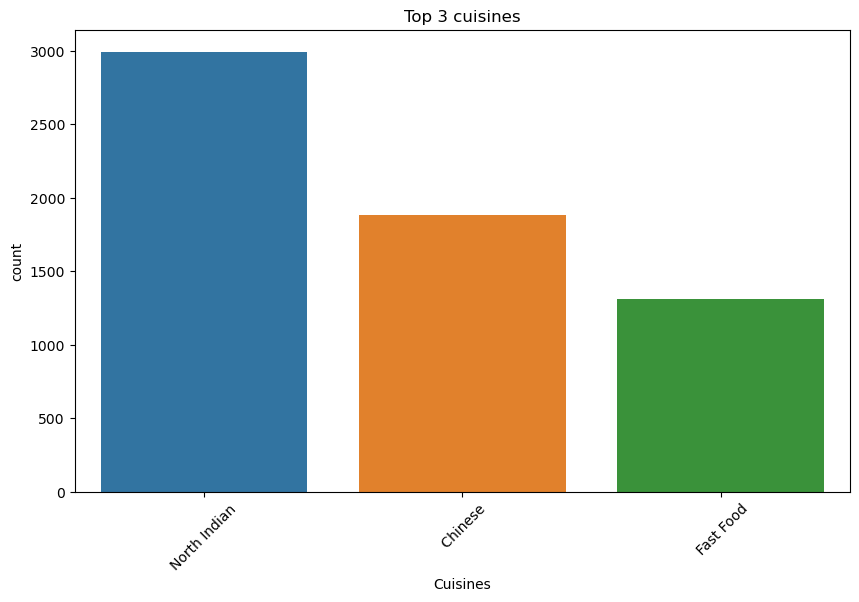

In [38]:
# Lets Plot the data to see it visually.
top_3_cuisines = resturant_data_cuisines_split_value_count_final.reset_index(name='count')
top_3_cuisines

# plotting the data using bar graph.
print(top_3_cuisines)
plt.figure(figsize=(10,6))
sns.barplot(top_3_cuisines,x='index',y='count')
plt.xlabel("Cuisines")
plt.title("Top 3 cuisines")
plt.xticks(rotation=45)
plt.show()

**The image is a bar chart titled "The top three most common cuisines."** It displays the count of three different cuisines: North Indian, Chinese, and Fast Food. The y-axis represents the count, while the x-axis lists the cuisines. The counts for each cuisine are labeled on top of the bars:

- **North Indian:** 2.992k
- **Chinese:** 1.880k
- **Fast Food:** 1.314k

The chart clearly shows that North Indian cuisine is the most common, followed by Chinese and Fast Food.


# Task 1 :Top Cuisines

* **Calculate the percentage of restaurants that serve each of the top cuisines.**


In [11]:
# Calculate the percentage of restaurants that serve each of the top cuisines.
print(top_3_cuisines)
# Calculate the percentage of # Calculate the percentage of restaurants that serve each cuisine that serve each cuisine
Total_Restaurants = len(resturant_data)
Percentage_of_cuisines = ((resturant_data_cuisines_split_value_count/Total_Restaurants)*100).round(2).head(3)
print("\n",Percentage_of_cuisines)

          index     0
0  North Indian  2992
1       Chinese  1880
2     Fast Food  1314

 North Indian    31.36
 Chinese        19.70
 Fast Food      13.77
dtype: float64


          index  Percentage
0  North Indian       31.36
1       Chinese       19.70
2     Fast Food       13.77


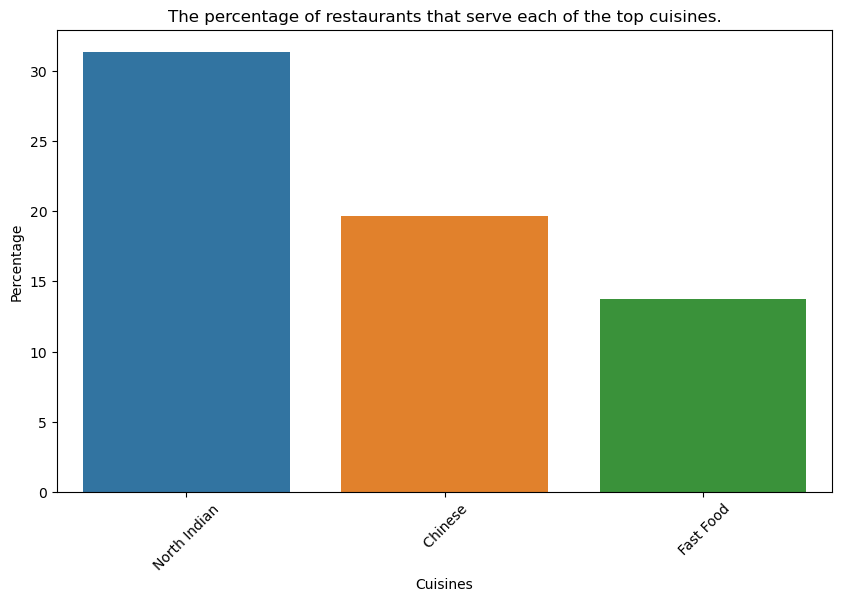

In [37]:
Percentage_of_cuisines_bar = Percentage_of_cuisines.reset_index(name ='Percentage')
Percentage_of_cuisines_bar

# plotting the data using bar graph.
print(Percentage_of_cuisines_bar)
plt.figure(figsize=(10,6))
sns.barplot(Percentage_of_cuisines_bar,x='index',y='Percentage')
plt.xlabel("Cuisines")
plt.title("The percentage of restaurants that serve each of the top cuisines.")
plt.xticks(rotation=45)
plt.show()

**The image is a bar chart titled "The percentage of restaurants that serve each of the top cuisines."** It displays the count of three different cuisines: North Indian, Chinese, and Fast Food. The y-axis represents the Percentage, while the x-axis lists the cuisines. The counts for each cuisine are labeled on top of the bars:

- **North Indian:** 31.36%
- **Chinese:** 19.70%
- **Fast Food:** 13.77%

The chart clearly shows that North Indian cuisine is the most common, followed by Chinese and Fast Food.


# Task 2 : City Analysis

* **Identify the city with the highest number of restaurants in the dataset.**

In [13]:
#Identify the city with the highest number of restaurants in the dataset
# Lets See the cuisines column first.
resturant_data["City"].head()

0         Makati City
1         Makati City
2    Mandaluyong City
3    Mandaluyong City
4    Mandaluyong City
Name: City, dtype: object

In [14]:
# Lets see the top 3 Cities
resturant_data_cuisines_city_value_count = resturant_data["City"].value_counts()
resturant_data_cuisines_city_value_count.head(3)

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

       index  count
0  New Delhi   5473
1    Gurgaon   1118
2      Noida   1080


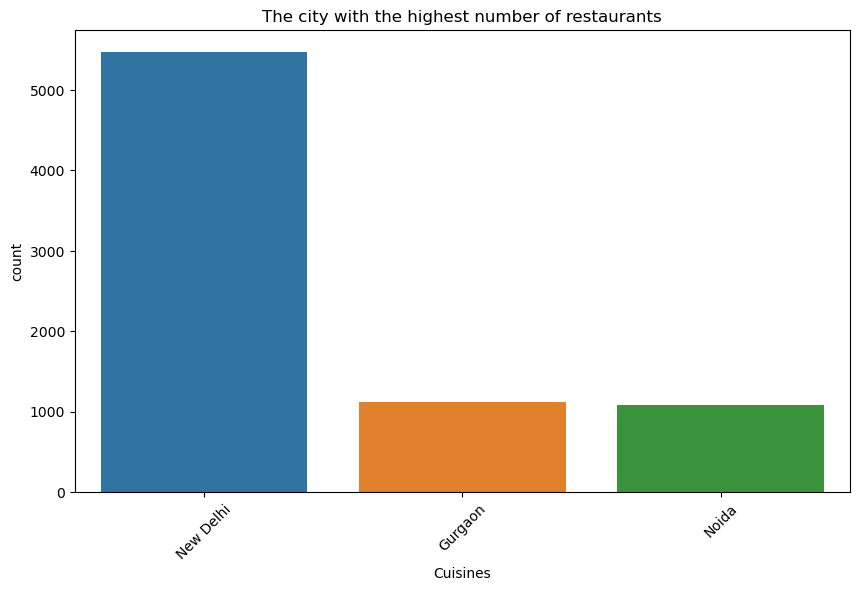

In [42]:
# Lets plot this data
resturant_data_cuisines_city_value_count_bar = resturant_data_cuisines_city_value_count.head(3).reset_index(name='count')
resturant_data_cuisines_city_value_count_bar
# plotting the data using bar graph.
print(resturant_data_cuisines_city_value_count_bar)
plt.figure(figsize=(10,6))
sns.barplot(resturant_data_cuisines_city_value_count_bar,x='index',y='count')
plt.xlabel("Cuisines")
plt.title("The city with the highest number of restaurants")
plt.xticks(rotation=45)
plt.show()

## Analysis

* **New Delhi boasts the tallest bar, indicating it has the highest number of restaurants, with a count of 5.473k.**

# Task 2 : City Analysis

* **Calculate the average rating for restaurants in each city.**

In [16]:
# Group by city and calculate the average rating for each city 
average_ratings = resturant_data.groupby('City')['Aggregate rating'].mean().reset_index() 
# Rename the columns for clarity 
average_ratings.columns = ['City', 'Average Rating'] 
# We are displaying the sample of the average ratings
print(average_ratings.sample(10).reset_index(drop=True))

              City  Average Rating
0  Wellington City        4.250000
1          Lucknow        4.195238
2         Columbus        4.030000
3         Randburg        4.300000
4    Victor Harbor        3.600000
5         Savannah        4.168421
6          Dubuque        3.535000
7            Dubai        4.370000
8        Allahabad        3.395000
9        Abu Dhabi        4.300000


# Task 2 : City Analysis

* **Determine the city with the highest average rating.**

In [17]:
# Determine the city with the highest average rating.
average_ratings.sort_values("Average Rating",ascending=False).reset_index(drop=True).head(1)

,City,Average Rating
0,Inner City,4.9


* **We can see that inner city with 4.9**

# Task 3 : Price Range Distribution

* **Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.**

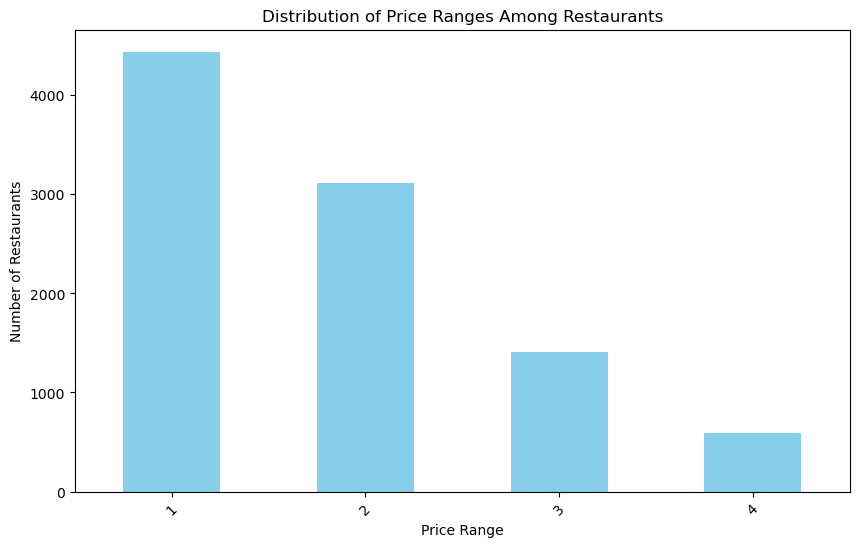

In [18]:
# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

plt.figure(figsize=(10, 6)) 
resturant_data['Price range'].value_counts().sort_index().plot(kind='bar', color='skyblue') 
plt.title('Distribution of Price Ranges Among Restaurants') 
plt.xlabel('Price Range') 
plt.ylabel('Number of Restaurants') 
plt.xticks(rotation=45)
plt.show()

# Task 3 : Price Range Distribution

* **Calculate the percentage of restaurants in each price range category.**

In [19]:
# Calculate the percentage of restaurants in each price range category.
# Count the number of restaurants in each price range 
price_range_counts = resturant_data['Price range'].value_counts() 
# Calculate the percentage of restaurants in each price range 
price_range_percentage = ((price_range_counts / len(resturant_data)) * 100).round(2) 
# Display the percentage 
print("The percentage of restaurants in each price range category.")
print(price_range_percentage)

The percentage of restaurants in each price range category.
1    46.51
2    32.62
3    14.72
4     6.14
Name: Price range, dtype: float64


# Task 4 : Online Delivery

* **Determine the percentage of restaurants that offer online delivery.**

In [20]:
# Determine the percentage of restaurants that offer online delivery.
# Calculate the number of restaurants that offer online delivery 
online_delivery_count = (resturant_data['Has Online delivery'] == 'Yes').sum()
# Calculate the percentage of restaurants that offer online delivery 
online_delivery_percentage = (online_delivery_count / len(resturant_data)) * 100
print(f"The percentage of restaurants that offer online delivery is :",online_delivery_percentage.round(2),"%")                         

The percentage of restaurants that offer online delivery is : 25.69 %


# Task 4 : Online Delivery

* **Compare the average ratings of restaurants with and without online delivery.**

In [21]:
# Separate the data into two groups 
online_delivery = resturant_data[resturant_data['Has Online delivery'] == 'Yes'] 
no_online_delivery = resturant_data[resturant_data['Has Online delivery'] == 'No'] 
# Calculate the average rating for each group 
average_rating_online_delivery = online_delivery['Aggregate rating'].mean() 
average_rating_no_online_delivery = no_online_delivery['Aggregate rating'].mean() 
print("Average rating for restaurants with online delivery:",average_rating_online_delivery.round(2)) 
print("Average rating for restaurants without online delivery:",average_rating_no_online_delivery.round(2))

Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.46
